In [1]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import skimage
import numpy as np
import scipy.signal
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [3]:
img = plt.imread('cat_small.jpg', 'jpg')
gray_img = rgb2gray(img)

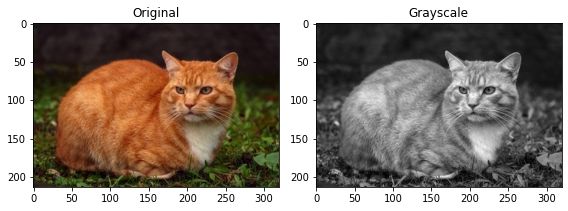

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [5]:
noise = skimage.util.random_noise(gray_img, mode='gaussian', mean=0, var=0.1)

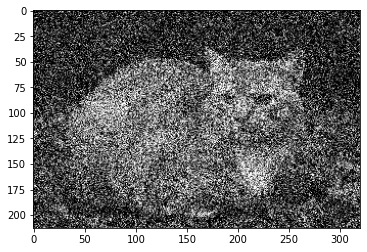

In [6]:
plt.imshow(noise, cmap=plt.cm.gray)
plt.show()

In [48]:
Hd = np.zeros((5, 5), dtype=np.float64)
Hd[2:5, 2:5] = np.ones((3, 3), np.float64)

In [49]:
f1 = [-0.8571, -0.5714, -0.2857, 0, 0.2857, 0.5714, 0.8571]
f2 = [-0.8571, -0.5714, -0.2857, 0, 0.2857, 0.5714, 0.8571]

x, y = np.meshgrid(f1, f2)

H = scipy.signal.sepfir2d(Hd, f1, f2)

In [51]:
H = np.array([
        [0, 0, 0, -0.0039, 0, 0, 0],
        [0, 0.0008, 0.0065, 0.0105, 0.0065, 0.0008, 0],
        [0, 0.0065, 0.0597, 0.1059, 0.0597, 0.0065, 0],
        [-0.0039, 0.0105, 0.1059, 0.1837, 0.1059, 0.0105, -0.0039],
        [0, 0.0065, 0.0597, 0.1059, 0.0597, 0.0065, 0],
        [0, 0.0008, 0.0065, 0.0105, 0.0065, 0.0008, 0],
        [0, 0, 0, -0.0039, 0, 0, 0]
])

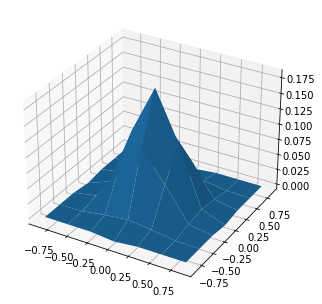

In [52]:
fig = pylab.figure()
axes = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(axes)


axes.plot_surface(x, y, H)
pylab.show()

In [42]:
filter_img = scipy.signal.convolve2d(noise, H)

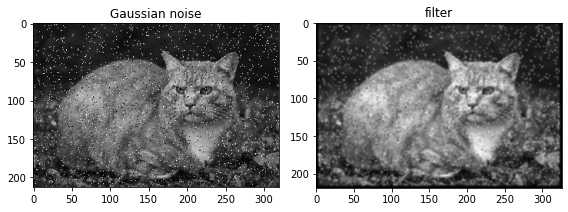

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(noise, cmap=plt.cm.gray)
ax[0].set_title("Gaussian noise")
ax[1].imshow(filter_img, cmap=plt.cm.gray)
ax[1].set_title("filter")

fig.tight_layout()
plt.show()
plt.show()

In [44]:
noise = skimage.util.random_noise(gray_img, mode='s&p')
filter_img = scipy.signal.convolve2d(noise, H)

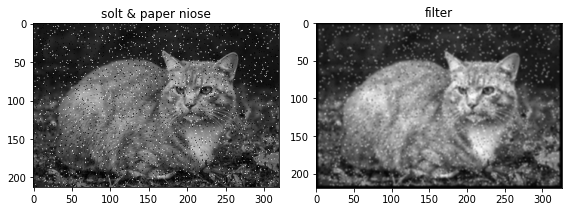

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(noise, cmap=plt.cm.gray)
ax[0].set_title("solt & paper niose")
ax[1].imshow(filter_img, cmap=plt.cm.gray)
ax[1].set_title("filter")

fig.tight_layout()
plt.show()

In [46]:
filter_img = scipy.signal.medfilt2d(gray_img)

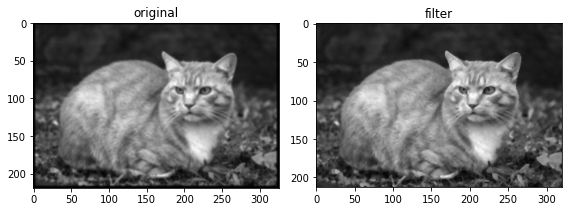

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(scipy.signal.convolve2d(gray_img, H), cmap=plt.cm.gray)
ax[0].set_title("original")
ax[1].imshow(filter_img, cmap=plt.cm.gray)
ax[1].set_title("filter")

fig.tight_layout()
plt.show()